In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
DATASET_DIRECTORY = 'C:/Users/EDWIN/Downloads/CICIoT2023'
df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()
dfs=[]
#Dropping NA values
for file in tqdm(df_sets):
    file_path=os.path.join(DATASET_DIRECTORY,file)
    df=pd.read_csv(file_path)
    df.dropna()
    dfs.append(df)
    
print(dfs[0])

100%|██████████| 169/169 [02:31<00:00,  1.12it/s]


        flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0            0.000000          54.00           6.00     64.00     0.329807   
1            0.000000          57.04           6.33     64.00     4.290556   
2            0.000000           0.00           1.00     64.00    33.396799   
3            0.328175       76175.00          17.00     64.00  4642.133010   
4            0.117320         101.73           6.11     65.91     6.202211   
...               ...            ...            ...       ...          ...   
238682       0.000000          54.00           6.00     64.00     3.049186   
238683       0.000000          54.00           6.00     64.00   183.433732   
238684       0.000785          56.29           6.11     64.00   306.952216   
238685       0.000901          72.09           6.11     64.64   158.475986   
238686       0.000000           0.00           1.00     64.00     1.291274   

              Srate  Drate  fin_flag_number  syn_flag_number  r

In [3]:
for df in dfs:
    print(df['label'].value_counts().shape)

(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,)
(34,

In [4]:
# Import label encoder
from sklearn import preprocessing

# Create a label encoder object
label_encoder = preprocessing.LabelEncoder()
for idx,df in enumerate(dfs):
    df['label'] = label_encoder.fit_transform(df['label'])
    print(df.head())
    dfs[idx]=df
    

   flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0       0.000000          54.00           6.00     64.00     0.329807   
1       0.000000          57.04           6.33     64.00     4.290556   
2       0.000000           0.00           1.00     64.00    33.396799   
3       0.328175       76175.00          17.00     64.00  4642.133010   
4       0.117320         101.73           6.11     65.91     6.202211   

         Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0     0.329807    0.0              1.0              0.0              1.0  ...   
1     4.290556    0.0              0.0              0.0              0.0  ...   
2    33.396799    0.0              0.0              0.0              0.0  ...   
3  4642.133010    0.0              0.0              0.0              0.0  ...   
4     6.202211    0.0              0.0              1.0              0.0  ...   

         Std  Tot size           IAT  Number   Magnitue     Radius  \
0   

In [6]:
for idx,df in tqdm(enumerate(dfs)):
    corr=df.corr()
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= 0.9:
                if columns[j]:
                    columns[j] = False
    selected_columns = df.columns[columns]
    selected_columns.shape
    dfs[idx]=df[selected_columns]

for df in dfs:
    print(df.shape)


0it [00:00, ?it/s]

169it [03:15,  1.16s/it]

(238687, 35)
(218805, 36)
(275258, 35)
(231023, 35)
(227491, 34)
(240046, 35)
(233793, 36)
(227910, 36)
(246327, 35)
(227616, 35)
(251392, 35)
(221928, 35)
(238476, 36)
(238761, 36)
(215838, 36)
(268649, 35)
(232885, 36)
(223444, 36)
(234430, 36)
(231063, 35)
(237151, 36)
(223401, 35)
(252212, 35)
(262062, 35)
(225725, 36)
(447625, 35)
(236152, 35)
(221014, 36)
(251225, 36)
(251676, 35)
(238350, 35)
(228730, 36)
(227636, 35)
(447774, 35)
(232228, 36)
(252744, 36)
(439212, 34)
(214963, 36)
(236660, 36)
(437362, 35)
(230365, 34)
(445281, 36)
(222425, 36)
(250954, 36)
(231980, 35)
(247290, 35)
(235566, 35)
(239086, 35)
(219877, 35)
(248997, 35)
(233625, 36)
(251256, 36)
(445425, 35)
(243279, 35)
(235625, 35)
(222384, 35)
(235026, 35)
(429585, 36)
(236995, 36)
(245184, 35)
(254147, 35)
(239643, 36)
(441027, 35)
(237426, 36)
(263065, 35)
(244926, 36)
(216084, 35)
(267928, 35)
(224089, 35)
(240206, 35)
(229776, 36)
(277720, 34)
(260695, 35)
(235721, 34)
(247037, 36)
(444334, 36)
(446795, 35)

In [7]:
# intersection 
common_columns = set(dfs[0].columns)  
for df in dfs[1:]:
    common_columns = common_columns.intersection(set(df.columns))

common_columns = list(common_columns)

for idx, df in tqdm(enumerate(dfs)):
    dfs[idx] = df[common_columns]



169it [00:35,  4.79it/s]


In [8]:
all_data = pd.concat(dfs, ignore_index=True)

In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46686579 entries, 0 to 46686578
Data columns (total 34 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ack_flag_number  float64
 1   UDP              float64
 2   Variance         float64
 3   syn_count        float64
 4   fin_flag_number  float64
 5   IPv              float64
 6   label            int32  
 7   Min              float64
 8   HTTP             float64
 9   ece_flag_number  float64
 10  ARP              float64
 11  Drate            float64
 12  flow_duration    float64
 13  HTTPS            float64
 14  DHCP             float64
 15  SMTP             float64
 16  syn_flag_number  float64
 17  IAT              float64
 18  urg_count        float64
 19  Tot sum          float64
 20  Protocol Type    float64
 21  psh_flag_number  float64
 22  Max              float64
 23  Covariance       float64
 24  IRC              float64
 25  rst_count        float64
 26  ICMP             float64
 27  TCP       

In [10]:
all_data.shape

(46686579, 34)

In [29]:
df_sample = all_data.sample(frac=0.1, random_state=42)

In [30]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4668658 entries, 17798992 to 14635139
Data columns (total 34 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ack_flag_number  float64
 1   UDP              float64
 2   Variance         float64
 3   syn_count        float64
 4   fin_flag_number  float64
 5   IPv              float64
 6   label            int32  
 7   Min              float64
 8   HTTP             float64
 9   ece_flag_number  float64
 10  ARP              float64
 11  Drate            float64
 12  flow_duration    float64
 13  HTTPS            float64
 14  DHCP             float64
 15  SMTP             float64
 16  syn_flag_number  float64
 17  IAT              float64
 18  urg_count        float64
 19  Tot sum          float64
 20  Protocol Type    float64
 21  psh_flag_number  float64
 22  Max              float64
 23  Covariance       float64
 24  IRC              float64
 25  rst_count        float64
 26  ICMP             float64
 27  TCP      

In [31]:
df_sample.shape

(4668658, 34)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

timesteps = 1
num_features = df_sample.shape[1]  

# Build LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(timesteps, num_features), activation='relu', return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(34, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 1, 128)         │        83,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 34)             │         2,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,074 (527.63 KB)

 Trainable params: 135,074 (527.63 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from sklearn.utils.class_weight import compute_class_weight
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='min', restore_best_weights=True)

scaler = StandardScaler()

y = df_sample['label']
data = df_sample.values
data_reshaped = data.reshape((data.shape[0], timesteps, df_sample.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(data_reshaped, y, test_size=0.3, random_state=42)

n_samples, timesteps, n_features = X_train.shape
X_train_reshaped = X_train.reshape(-1, n_features)
X_test_reshaped = X_test.reshape(-1, n_features)

X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

X_train_scaled = X_train_scaled.reshape(n_samples, timesteps, n_features)
X_test_scaled = X_test_scaled.reshape(X_test.shape[0], timesteps, n_features)

# Fit the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=1024, callbacks=[early_stopping], validation_split=0.2)

# Make predictions
y_pred_probs = model.predict(X_test_scaled)


Epoch 1/20
2554/2554 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.8549 - loss: 0.5921 - val_accuracy: 0.9907 - val_loss: 0.0450
Epoch 2/20
2554/2554 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.9865 - loss: 0.0462 - val_accuracy: 0.9952 - val_loss: 0.0177
Epoch 3/20
2554/2554 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.9928 - loss: 0.0262 - val_accuracy: 0.9968 - val_loss: 0.0130
Epoch 4/20
2554/2554 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.9941 - loss: 0.0212 - val_accuracy: 0.9972 - val_loss: 0.0112
Epoch 5/20
2554/2554 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.9948 - loss: 0.0185 - val_accuracy: 0.9976 - val_loss: 0.0095
Epoch 6/20
2554/2554 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.9952 - loss: 0.0167 - val_accuracy: 0.9979 - val_loss: 0.0084
Epoch 7/20
2554/2554 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.9956 - loss: 0.0152 - val_accuracy: 0.9979 - val_loss: 0.0078
Epoch 8/20
2554/2554 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.9959 - los

In [34]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100}")

43769/43769 - 34s - 788us/step - accuracy: 0.9990 - loss: 0.0041
Test Accuracy: 99.89932775497437


In [37]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

y_pred_probs = model.predict(X_test_scaled)

y_pred = np.argmax(y_pred_probs, axis=1)

y_true = y_test

print("Predicted values:", y_pred)
print("True values:", y_true)

accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy*100}")

print(classification_report(y_true, y_pred))


43769/43769 ━━━━━━━━━━━━━━━━━━━━ 40s 920us/step
Predicted values: [13 12 19 ...  8 13  6]
True values: 15585041    13
24078035    12
27643328    19
3231462     24
34216357    24
            ..
24589714     6
3364834      1
28082172     8
28842770    13
30493996     6
Name: label, Length: 1400598, dtype: int32
Test Accuracy: 99.89932871530588
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.99      1.00      0.99     33185
           2       0.00      0.00      0.00       184
           3       1.00      0.15      0.26       170
           4       1.00      1.00      1.00      8625
           5       0.99      0.98      0.99       844
           6       1.00      1.00      1.00    215537
           7       1.00      1.00      1.00     13648
           8       1.00      1.00      1.00    122586
           9       1.00      1.00      1.00    121488
          10       1.00      1.00      1.00    122181
       

<Figure size 5000x5000 with 0 Axes>

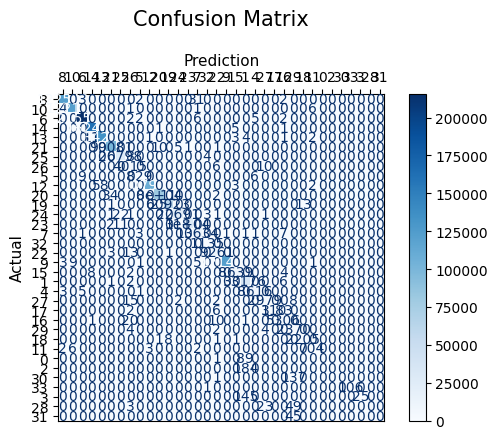

In [55]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.figure(figsize=(50, 50))
cm = confusion_matrix(y_true, y_pred, labels=df_sample.label.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df_sample.label.unique())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
#Customizations
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()


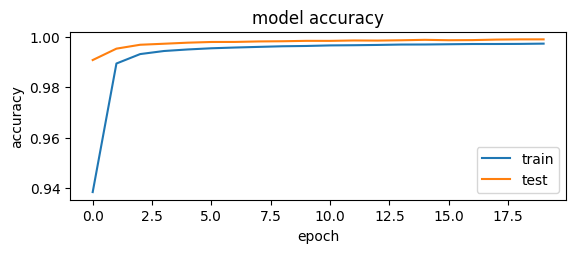

In [46]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

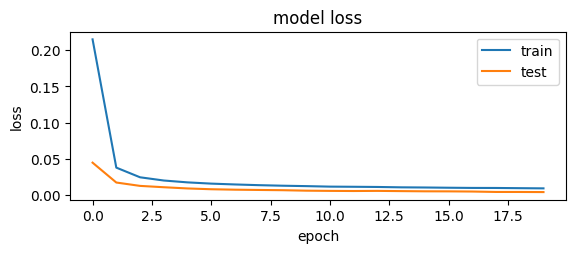

In [47]:
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')